In [1]:
import importlib
import models
importlib.reload(models)
from models import Model, TafelData
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filepath = r"Cell-A-Tafel.csv"
data_A = TafelData(filepath)
data_A = data_A.load_and_process()

filepath = r"Cell-B-Tafel.csv"
data_B = TafelData(filepath)
data_B = data_B.load_and_process()

filepath = r"Cell-C-Tafel.csv"
data_C = TafelData(filepath)
data_C = data_C.load_and_process()

eta = data_A.eta 

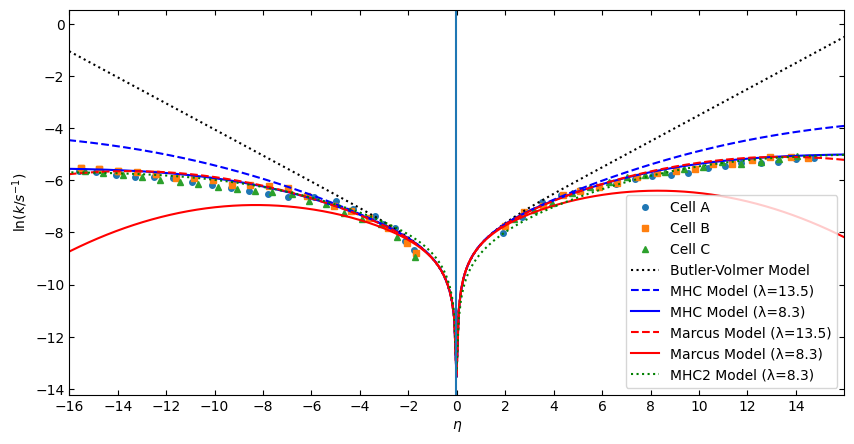

In [3]:
BV_paper = Model(model = 'BV', k01=1.174e-4, k02=2.035e-4, alpha=0.5, eta=eta)
MHC_paper_8_3 = Model(model = 'MHC', k01=1.190e-4, k02=2.062e-4, lambda_=8.3, eta=eta)  
MHC_paper_13_5 = Model(model = 'MHC', k01=1.208e-4, k02=2.093e-4, lambda_=13.5, eta=eta)
Marcus_paper_8_3 = Model(model = 'Marcus', k01=1.204e-4, k02=2.086e-4, lambda_=8.3, eta=eta)
Marcus_paper_13_5 = Model(model = 'Marcus', k01=1.204e-4, k02=2.086e-4, lambda_=13.5, eta=eta)  
MHC2_paper_13_5 = Model(model = 'MHC2', k01=2.093e-4, k02=2.093e-4, lambda_=13.5, eta=eta, C=0.5772)
MHC2_paper_8_3 = Model(model = 'MHC2', k01=2.062e-4, k02=2.062e-4, lambda_=8.3, eta=eta, C=0.5)           

plt.figure(figsize=(10,5))

plt.plot(data_A.eta, data_A.lnk, 'o', label='Cell A', markersize=4)
plt.plot(data_B.eta, data_B.lnk, 's', label='Cell B', markersize=4)
plt.plot(data_C.eta, data_C.lnk, '^', label='Cell C', markersize=4)
plt.plot(BV_paper.ln_k()[0], BV_paper.ln_k()[1], label='Butler-Volmer Model', color="black", linestyle=':')
plt.plot(MHC_paper_13_5.ln_k()[0], MHC_paper_13_5.ln_k()[1], label='MHC Model (λ=13.5)', color='blue', linestyle='--')
plt.plot(MHC_paper_8_3.ln_k()[0], MHC_paper_8_3.ln_k()[1], label='MHC Model (λ=8.3)', color='blue')
plt.plot(Marcus_paper_13_5.ln_k()[0], Marcus_paper_13_5.ln_k()[1], label='Marcus Model (λ=13.5)', color='red', linestyle='--')
plt.plot(Marcus_paper_8_3.ln_k()[0], Marcus_paper_8_3.ln_k()[1], label='Marcus Model (λ=8.3)', color='red')
#plt.plot(MHC2_paper_13_5.ln_k()[0], MHC2_paper_13_5.ln_k()[1], label='MHC2 Model (λ=13.5)', color='green', linestyle='-.')
plt.plot(MHC2_paper_8_3.ln_k()[0], MHC2_paper_8_3.ln_k()[1], label='MHC2 Model (λ=8.3)', color='green', linestyle=':')
plt.axvline(MHC2_paper_8_3.ln_k()[0][np.argmin(MHC2_paper_8_3.ln_k()[1])])

plt.legend()

plt.ylabel(r'$\ln(k/s^{-1})$')
plt.xlabel(r'$\eta$')
plt.xticks(np.arange(-16, 16, 2))
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.xlim(-16,16)
plt.show()
print()

In [4]:
print(min(MHC2_paper_8_3.ln_k()[1]))
#print min index
print(np.argmin(MHC2_paper_8_3.ln_k()[1]))
print(MHC2_paper_8_3.ln_k()[0][np.argmin(MHC2_paper_8_3.ln_k()[1])])
print(MHC_paper_8_3.ln_k()[0][np.argmin(MHC2_paper_8_3.ln_k()[1])])

-13.337730860353984
180
-0.011077641219511491
-0.011077641219511491


# Param sweep of C using the above example

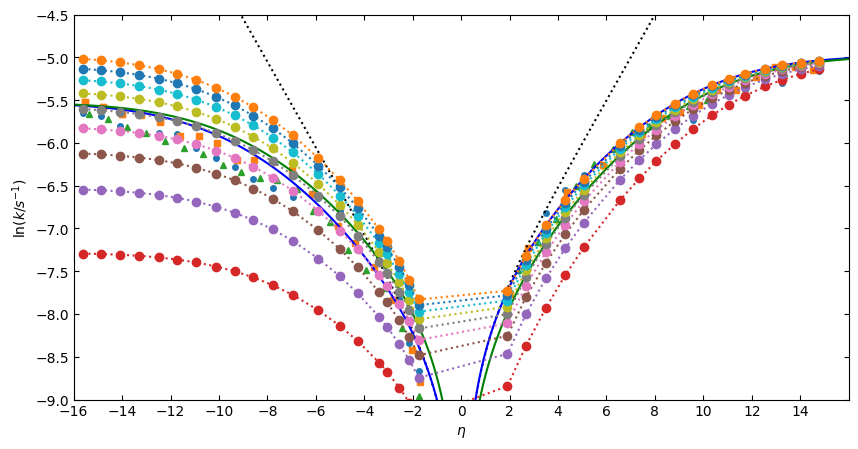

In [5]:
# Exploring how different C values effect the graph

BV_paper = Model(model = 'BV', k01=1.174e-4, k02=2.035e-4, alpha=0.5, eta=eta)
MHC_paper_8_3 = Model(model = 'MHC', k01=1.190e-4, k02=2.062e-4, lambda_=8.3, eta=eta)  
MHC2_paper_8_3 = Model(model = 'MHC2', k01=2.062e-4, k02=2.062e-4, lambda_=8.3, eta=eta, C=0.5772)           

plt.figure(figsize=(10,5))

plt.plot(data_A.eta, data_A.lnk, 'o', label='Cell A', markersize=4)
plt.plot(data_B.eta, data_B.lnk, 's', label='Cell B', markersize=4)
plt.plot(data_C.eta, data_C.lnk, '^', label='Cell C', markersize=4)
plt.plot(BV_paper.ln_k()[0], BV_paper.ln_k()[1], label='Butler-Volmer Model', color="black", linestyle=':')
plt.plot(MHC_paper_8_3.ln_k()[0], MHC_paper_8_3.ln_k()[1], label='MHC Model (λ=8.3)', color='blue')
plt.plot(MHC2_paper_8_3.ln_k()[0], MHC2_paper_8_3.ln_k()[1], label='MHC2 Model (λ=8.3)', color='green')

Cs = np.linspace(0.1, 1.0, 9)

for C in Cs:
     MHC2_paper_8_3 = Model(model = 'MHC2', k01=2.062e-4, k02=2.062e-4, lambda_=8.3, eta=eta, C=C, origin_eta=True) 
     plt.plot(MHC2_paper_8_3.ln_k()[0], MHC2_paper_8_3.ln_k()[1], 'o', label=f'MHC2 Model (λ=8.3) C={C}', linestyle=':')



plt.ylabel(r'$\ln(k/s^{-1})$')
plt.xlabel(r'$\eta$')
plt.xticks(np.arange(-16, 16, 2))
plt.ylim(-9,-4.5)
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.xlim(-16,16)
plt.show()
print()

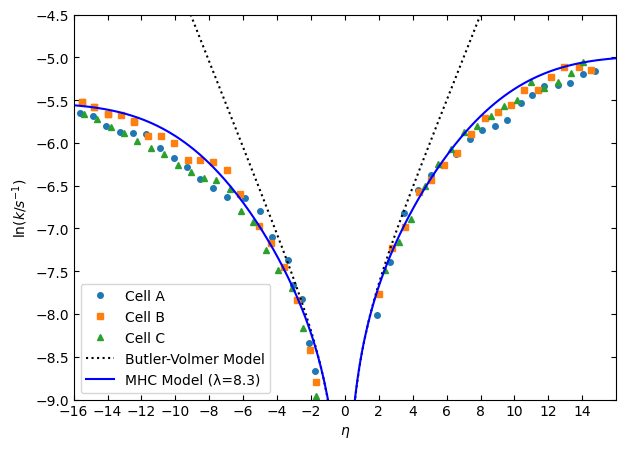

In [6]:
plt.figure(figsize=(7,5))

plt.plot(data_A.eta, data_A.lnk, 'o', label='Cell A', markersize=4)
plt.plot(data_B.eta, data_B.lnk, 's', label='Cell B', markersize=4)
plt.plot(data_C.eta, data_C.lnk, '^', label='Cell C', markersize=4)
plt.plot(BV_paper.ln_k()[0], BV_paper.ln_k()[1], label='Butler-Volmer Model', color="black", linestyle=':')
#plt.plot(MHC_paper_13_5.ln_k()[0], MHC_paper_13_5.ln_k()[1], label='MHC Model (λ=13.5)', color='blue', linestyle='--')
plt.plot(MHC_paper_8_3.ln_k()[0], MHC_paper_8_3.ln_k()[1], label='MHC Model (λ=8.3)', color='blue')
#plt.plot(MHC2_paper_13_5.ln_k()[0], MHC2_paper_13_5.ln_k()[1], label='MHC2 Model (λ=13.5)', color='green', linestyle='-.')
#plt.plot(MHC2_paper_8_3.ln_k()[0], MHC2_paper_8_3.ln_k()[1], label='MHC2 Model (λ=8.3)', color='green', linestyle=':')

plt.legend()

#plt.plot(MHC_paper_1.ln_k()[0], MHC_paper_1.ln_k()[1], label='MHC Model')

plt.ylim(-9,-4.5)
plt.ylabel(r'$\ln(k/s^{-1})$')
plt.xlabel(r'$\eta$')
plt.xticks(np.arange(-16, 16, 2))
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.xlim(-16,16)
plt.show()

# Clean plot for presentation

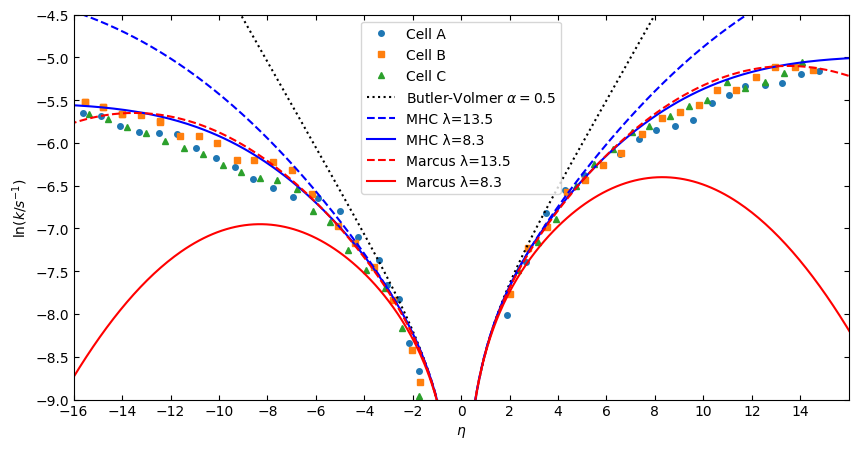

In [7]:
plt.figure(figsize=(10,5))

plt.plot(data_A.eta, data_A.lnk, 'o', label='Cell A', markersize=4)
plt.plot(data_B.eta, data_B.lnk, 's', label='Cell B', markersize=4)
plt.plot(data_C.eta, data_C.lnk, '^', label='Cell C ', markersize=4)
plt.plot(BV_paper.ln_k()[0], BV_paper.ln_k()[1], label=r'Butler-Volmer $\alpha=0.5$', color="black", linestyle=':')
plt.plot(MHC_paper_13_5.ln_k()[0], MHC_paper_13_5.ln_k()[1], label='MHC λ=13.5', color='blue', linestyle='--')
plt.plot(MHC_paper_8_3.ln_k()[0], MHC_paper_8_3.ln_k()[1], label='MHC λ=8.3', color='blue')
plt.plot(Marcus_paper_13_5.ln_k()[0], Marcus_paper_13_5.ln_k()[1], label='Marcus λ=13.5', color='red', linestyle='--')
plt.plot(Marcus_paper_8_3.ln_k()[0], Marcus_paper_8_3.ln_k()[1], label='Marcus λ=8.3', color='red')

#plt.plot(MHC_paper_1.ln_k()[0], MHC_paper_1.ln_k()[1], label='MHC Model')
plt.legend()
plt.ylim(-9,-4.5)
plt.ylabel(r'$\ln(k/s^{-1})$')
plt.xlabel(r'$\eta$')
plt.xticks(np.arange(-16, 16, 2))
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.xlim(-16,16)
plt.show()

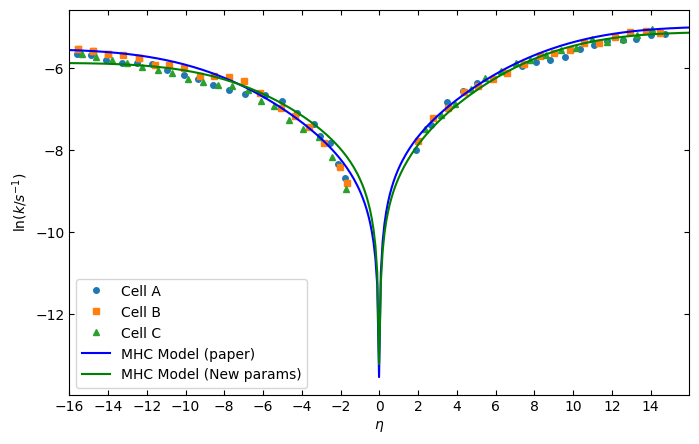

In [18]:
Marcus_paper_8_3 = Model(model = 'Marcus', k01=1.204e-4, k02=2.086e-4, lambda_=8.3, eta=eta)  
MHC2_paper_8_3 = Model(model = 'MHC2', k01=2.375086e-04, k02=1, lambda_=7.311, C=0.471369, eta=eta)
         

plt.figure(figsize=(8,5))

plt.plot(data_A.eta, data_A.lnk, 'o', label='Cell A', markersize=4)
plt.plot(data_B.eta, data_B.lnk, 's', label='Cell B', markersize=4)
plt.plot(data_C.eta, data_C.lnk, '^', label='Cell C', markersize=4)
plt.plot(MHC_paper_8_3.ln_k()[0], MHC_paper_8_3.ln_k()[1], label='MHC Model (paper)', color='blue')
plt.plot(MHC2_paper_8_3.ln_k()[0], MHC2_paper_8_3.ln_k()[1], label='MHC Model (New params)', color='green')


plt.legend()

plt.fontsize=14
plt.ylabel(r'$\ln(k/s^{-1})$')
plt.xlabel(r'$\eta$')
plt.xticks(np.arange(-16, 16, 2))
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.xlim(-16,16)
plt.show()
print()

In [16]:
# Calculate errors between models and experimental data
import numpy as np

# Get model predictions
marcus_eta, marcus_lnk = MHC_paper_8_3.ln_k()
mhc2_eta, mhc2_lnk = MHC2_paper_8_3.ln_k()

# Combine all experimental data
exp_eta = np.concatenate([data_A.eta, data_B.eta, data_C.eta])
exp_lnk = np.concatenate([data_A.lnk, data_B.lnk, data_C.lnk])

print("Error Analysis for Models vs Experimental Data")
print("=" * 55)

# Calculate errors for Marcus model
marcus_lnk_interp = np.interp(exp_eta, marcus_eta, marcus_lnk)
marcus_residuals = exp_lnk - marcus_lnk_interp
marcus_rmse = np.sqrt(np.mean(marcus_residuals**2))
marcus_mae = np.mean(np.abs(marcus_residuals))
marcus_max_error = np.max(np.abs(marcus_residuals))

print(f"\nMarcus Model (paper parameters):")
print(f"  RMSE:      {marcus_rmse:.4f}")
print(f"  MAE:       {marcus_mae:.4f}")
print(f"  Max Error: {marcus_max_error:.4f}")
print(f"  Mean Bias: {np.mean(marcus_residuals):.4f}")

# Calculate errors for MHC2 model
mhc2_lnk_interp = np.interp(exp_eta, mhc2_eta, mhc2_lnk)
mhc2_residuals = exp_lnk - mhc2_lnk_interp
mhc2_rmse = np.sqrt(np.mean(mhc2_residuals**2))
mhc2_mae = np.mean(np.abs(mhc2_residuals))
mhc2_max_error = np.max(np.abs(mhc2_residuals))

print(f"\nMHC2 Model (new parameters):")
print(f"  RMSE:      {mhc2_rmse:.4f}")
print(f"  MAE:       {mhc2_mae:.4f}")
print(f"  Max Error: {mhc2_max_error:.4f}")
print(f"  Mean Bias: {np.mean(mhc2_residuals):.4f}")

# Compare models
print(f"\nModel Comparison:")
print(f"  Better RMSE: {'MHC2' if mhc2_rmse < marcus_rmse else 'Marcus'} ({min(mhc2_rmse, marcus_rmse):.4f} vs {max(mhc2_rmse, marcus_rmse):.4f})")
print(f"  Better MAE:  {'MHC2' if mhc2_mae < marcus_mae else 'Marcus'} ({min(mhc2_mae, marcus_mae):.4f} vs {max(mhc2_mae, marcus_mae):.4f})")

improvement_rmse = abs(mhc2_rmse - marcus_rmse) / max(mhc2_rmse, marcus_rmse) * 100
improvement_mae = abs(mhc2_mae - marcus_mae) / max(mhc2_mae, marcus_mae) * 100

print(f"  RMSE improvement: {improvement_rmse:.1f}%")
print(f"  MAE improvement:  {improvement_mae:.1f}%")

# Calculate R² for both models
ss_tot = np.sum((exp_lnk - np.mean(exp_lnk))**2)
ss_res_marcus = np.sum(marcus_residuals**2)
ss_res_mhc2 = np.sum(mhc2_residuals**2)

r2_marcus = 1 - (ss_res_marcus / ss_tot)
r2_mhc2 = 1 - (ss_res_mhc2 / ss_tot)

print(f"\nR² Values:")
print(f"  Marcus Model: {r2_marcus:.4f}")
print(f"  MHC2 Model:   {r2_mhc2:.4f}")

# Error breakdown by dataset
print(f"\nError Breakdown by Cell:")
for i, (name, data) in enumerate([('Cell A', data_A), ('Cell B', data_B), ('Cell C', data_C)]):
    # Marcus errors for this cell
    marcus_interp = np.interp(data.eta, marcus_eta, marcus_lnk)
    marcus_cell_rmse = np.sqrt(np.mean((data.lnk - marcus_interp)**2))
    
    # MHC2 errors for this cell
    mhc2_interp = np.interp(data.eta, mhc2_eta, mhc2_lnk)
    mhc2_cell_rmse = np.sqrt(np.mean((data.lnk - mhc2_interp)**2))
    
    print(f"  {name}: Marcus RMSE = {marcus_cell_rmse:.4f}, MHC2 RMSE = {mhc2_cell_rmse:.4f}")

Error Analysis for Models vs Experimental Data

Marcus Model (paper parameters):
  RMSE:      1.1671
  MAE:       0.8407
  Max Error: 3.4154
  Mean Bias: -0.7513

MHC2 Model (new parameters):
  RMSE:      0.9870
  MAE:       0.7029
  Max Error: 3.0842
  Mean Bias: -0.4201

Model Comparison:
  Better RMSE: MHC2 (0.9870 vs 1.1671)
  Better MAE:  MHC2 (0.7029 vs 0.8407)
  RMSE improvement: 15.4%
  MAE improvement:  16.4%

R² Values:
  Marcus Model: -0.7076
  MHC2 Model:   -0.2213

Error Breakdown by Cell:
  Cell A: Marcus RMSE = 1.2122, MHC2 RMSE = 1.0199
  Cell B: Marcus RMSE = 1.1121, MHC2 RMSE = 0.9524
  Cell C: Marcus RMSE = 1.1798, MHC2 RMSE = 0.9905
